# 준비

## 라이브러리

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

##  장비

In [2]:
if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
else:
    DEVICE = torch.device("cpu")
DEVICE

device(type='cuda')

## Config

In [3]:
BATCH_SIZE = 32
EPOCHS = 10

# 데이터

## 데이터셋

In [4]:
train_dataset = datasets.MNIST(root="../data/MNIST",
                              train=True,
                              download=True,
                              transform=transforms.ToTensor()) # tensor 형태로 변경, 0~1 범위로 정규화
test_dataset = datasets.MNIST(root="../data/MNIST",
                              train=False,
                              transform=transforms.ToTensor())

## data_loader

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                           batch_size=BATCH_SIZE,
                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

## 데이터

In [6]:
for (X_train, y_train) in train_loader:
    [_, _, H, W] = X_train.size()
    print("X_train:", X_train.size(), "type: ", X_train.type())
    print("y_train:", y_train.size(), "type: ", y_train.type())
    break

X_train: torch.Size([32, 1, 28, 28]) type:  torch.FloatTensor
y_train: torch.Size([32]) type:  torch.LongTensor


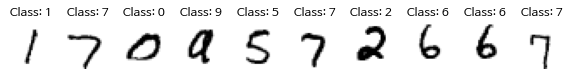

In [7]:
pltsize= 1
plt.figure(figsize=(10*pltsize, pltsize))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.axis("off")
    plt.imshow(X_train[i, : , :, :].numpy().reshape(28,28), cmap="gray_r")
    plt.title(f"Class: {y_train[i].item()}" )

# 모델

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(H*W, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        
    def forward(self, x):
        x = x.view(-1, 28*28) # Flatten
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

In [12]:
model = Net().to(DEVICE) # 모델 소환

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


# Train

In [ ]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()